In [117]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from IPython.core.pylabtools import figsize

In [69]:
def cov_matrix(w, v, kernel_func):
    """
    Calculate the covariance matrix between two 2d arrays w 
    and v using the provided Kernel function.
    """
    # Check that the second axis has same dimensionality for both arrays
    if w.shape[1]!=v.shape[1]:
        err_msg = "The arrays w and v must have the same second axis dimensionality."
        raise ValueError(err_msg)
    
    # Now reshape both vectors to 3dim arrays filling different dimernsions
    w3d = w[:, None, :]
    v3d = v[None, :, :]
    
    # Calculate the kernel function on these vectors
    return kernel['func'](w3d, v3d, params=kernel['params'])

def rbf_kernel(w, v, params={'lam': 1}):
    """
    Return the vectorized rbf Kernel between the arrays w and v.
    """ 
    # Calculate the norm of the difference, which has shape 
    # (w.0=#samples_w, v.1=#samples_v, w.2*v.2=sample_dim^2),
    # along the last axis (which would be axis 2)
    diff = np.linalg.norm(w-v, axis=-1)
    return np.exp(-diff**2/params['lam']**2/2)

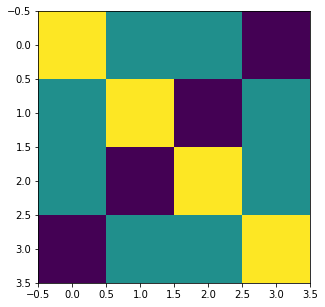

TypeError: scatter() missing 1 required positional argument: 'self'

In [116]:
# Set a random seed
np.random.seed(42)

# Define the number of samples
num_samples = 2

# Define the lambda parameter
lam = 10

# Create two test data points
data_x = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
data_x = np.linspace(0, 4, 5).reshape(-1, 1)

# Define the kernel function
kernel = {'func': rbf_kernel, 'params': {'lam': lam}}

# Calculate the covariance matrix of the data using the kernel
cov_mat = cov_matrix(data_x, data_x, kernel)

plt.imshow(cov_mat)
plt.show();

# Use this covariance matrix to built a multivariate Guassian 
# centered at the origin
mgauss = stats.multivariate_normal(mean=np.zeros(data_x.shape[0]), cov=cov_mat)

# Sample some points from this gaussian
samples = mgauss.rvs(size=num_samples)

# Plot the mgauss on a grid
x, y = np.mgrid[-3:3:.01, -3:3:.01]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y

# In case we have only two datapoints we can visualize things:
if data_x.shape[0]==2:
    print("Covariance Matrix:\n", cov_mat)
    print()
    
    print("Samples:\n", samples)
    print()

    figsize(5, 5)
    plt.contourf(x, y, mgauss.pdf(pos))
    plt.hlines(0, np.min(x), np.max(x), linestyles='--', color='w')
    plt.vlines(0, np.min(y), np.max(y), linestyles='--', color='w')
    plt.scatter(samples[:, 0], samples[:, 1], c='k', s=10)
    plt.xlabel('data_x_1')
    plt.ylabel('data_x_2')
    plt.show();


plt.plot(data_x, samples.T, 'o-')
plt.hlines(0, np.min(data_x), np.max(data_x), linestyles='--', color='c')
plt.xlabel('x')
plt.ylabel('y', rotation=0);